In [1]:
!pip install keras

In [2]:
!pip install tensorflow 

In [13]:
#importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense   #Creating hidden layers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import InputLayer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [4]:
Forestfires=pd.read_csv("forestfires.csv")
Forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
Forestfires.drop(columns=["month","day"],axis=1,inplace=True)

In [6]:
Forestfires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
Forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [8]:
Forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
Forestfires.shape

(517, 29)

In [10]:
Forestfires.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

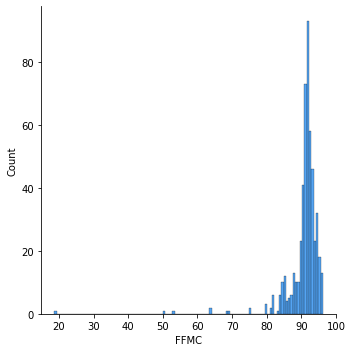

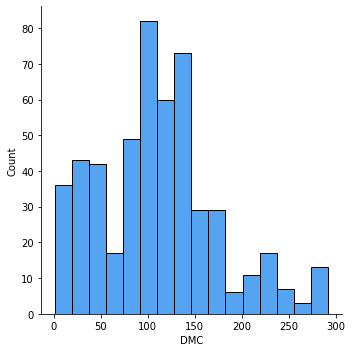

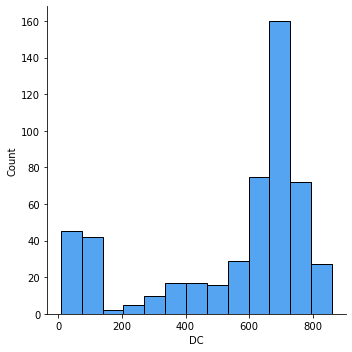

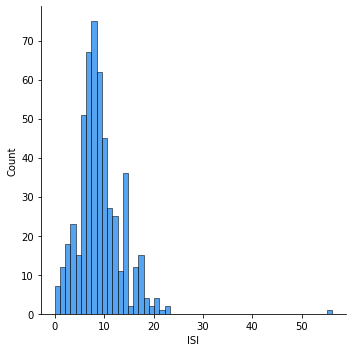

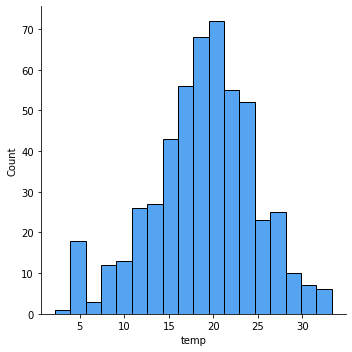

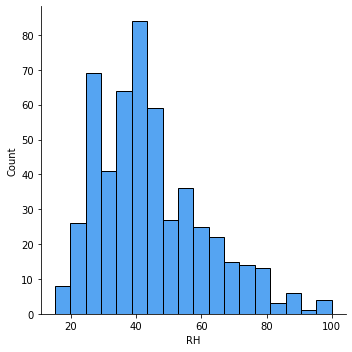

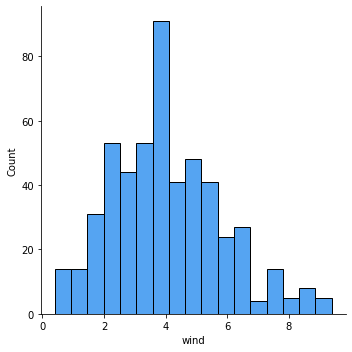

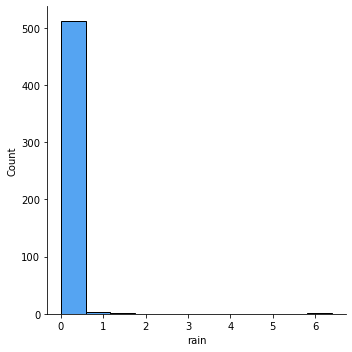

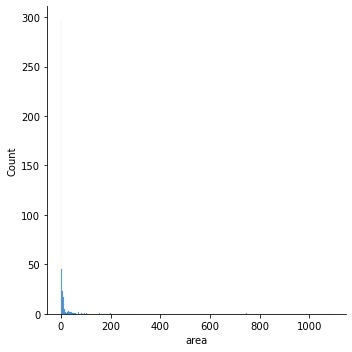

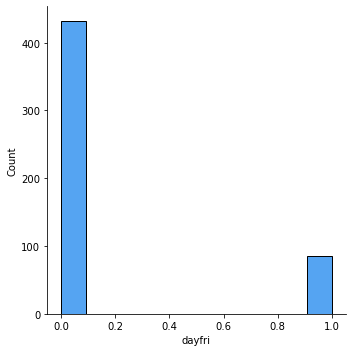

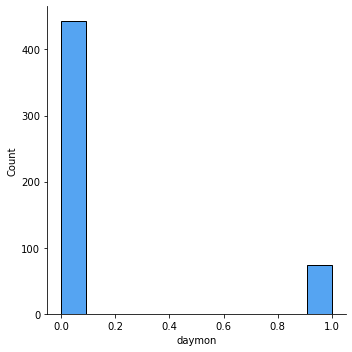

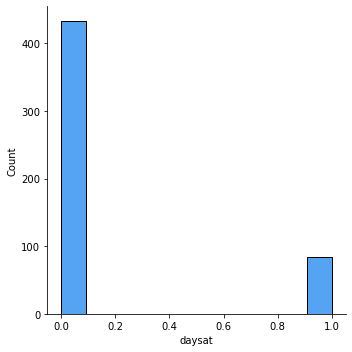

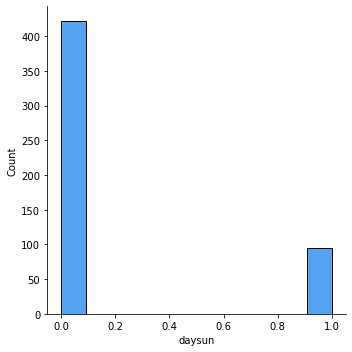

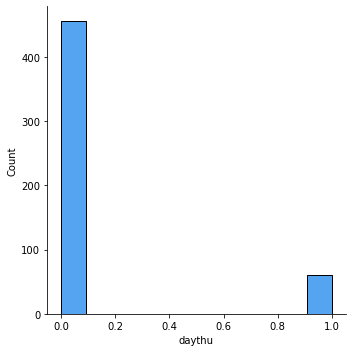

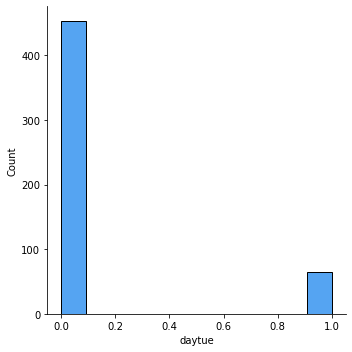

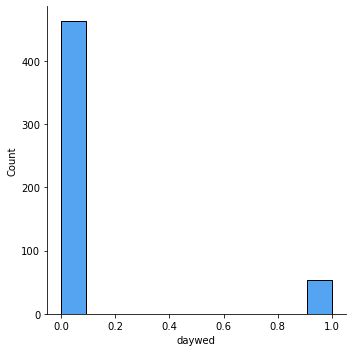

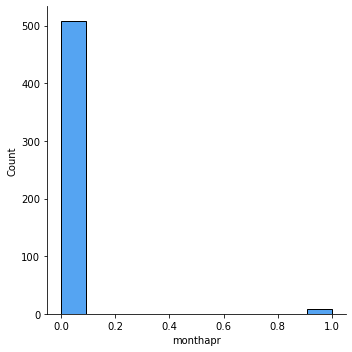

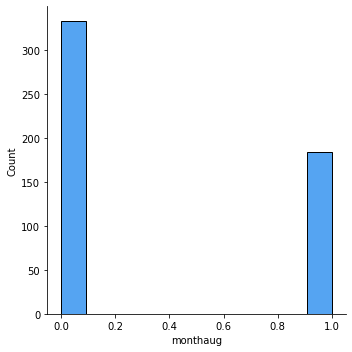

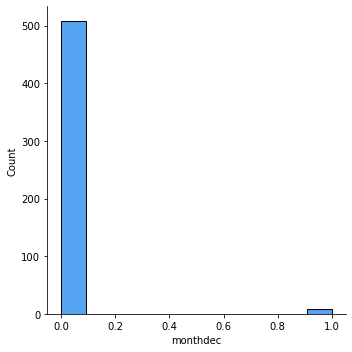

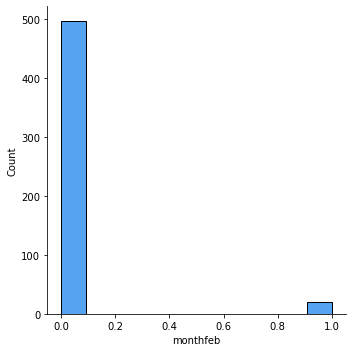

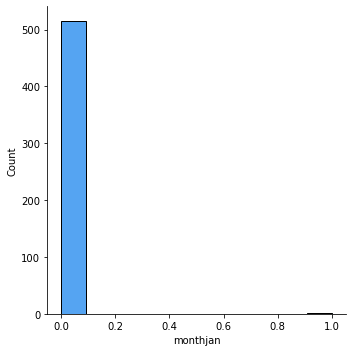

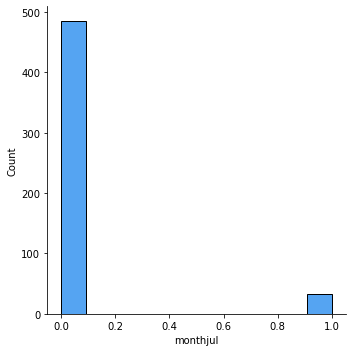

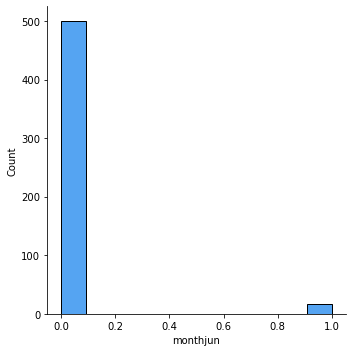

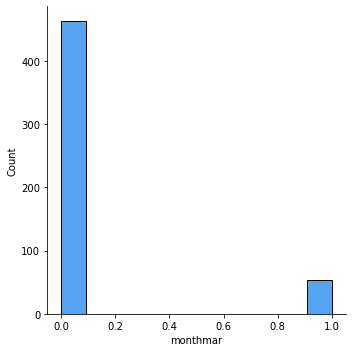

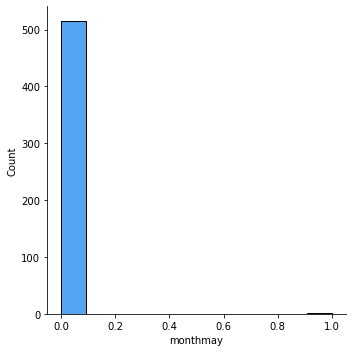

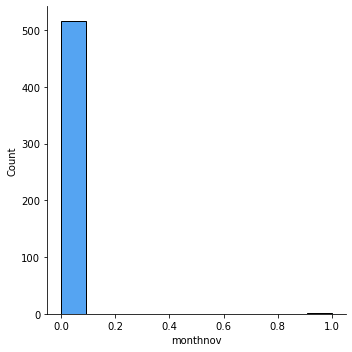

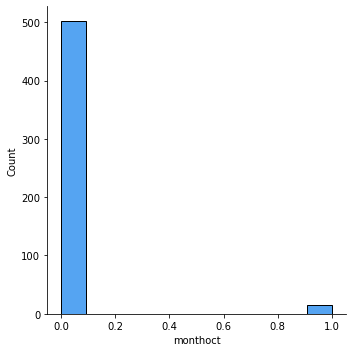

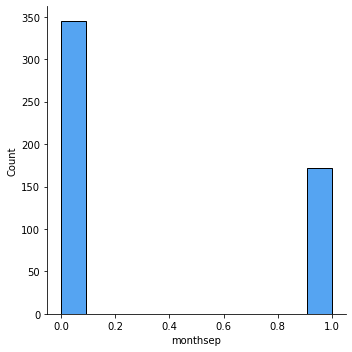

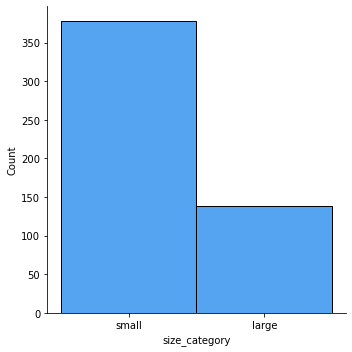

In [11]:
import warnings
warnings.filterwarnings("ignore")
for i in Forestfires.columns:
    sns.displot(x=i,data=Forestfires,color='#1C86EE');

FFMC


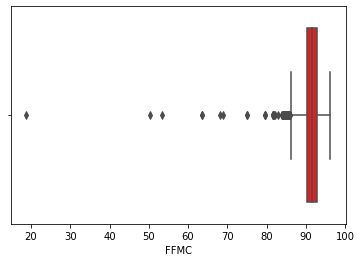

DMC


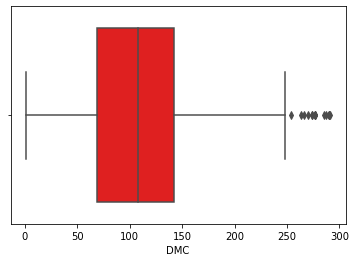

DC


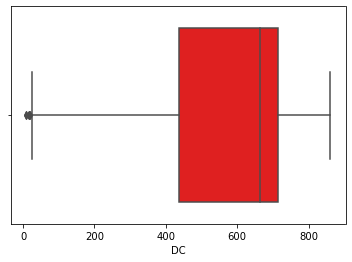

ISI


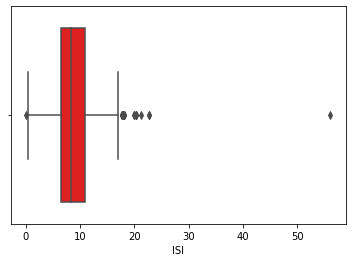

temp


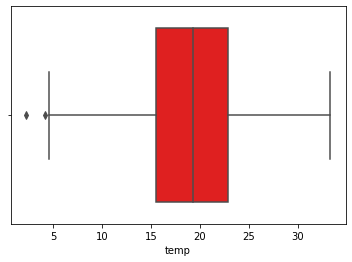

RH


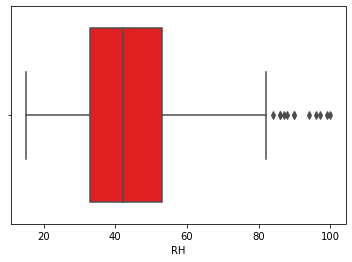

wind


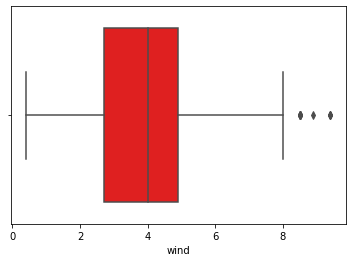

rain


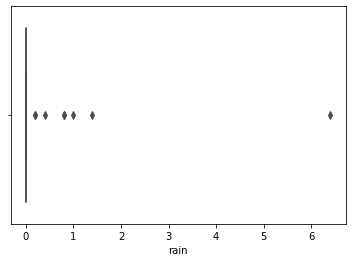

area


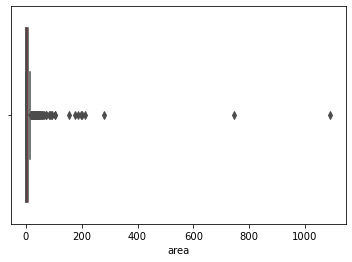

dayfri


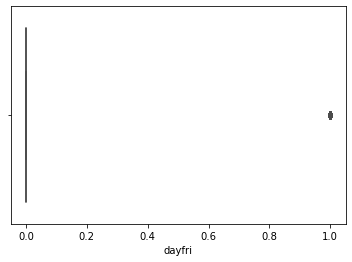

daymon


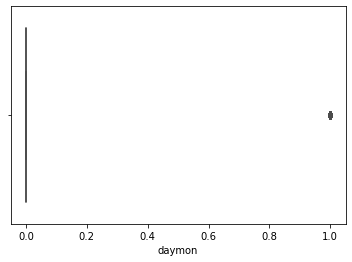

daysat


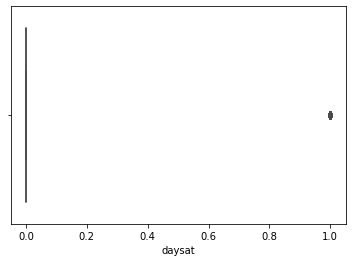

daysun


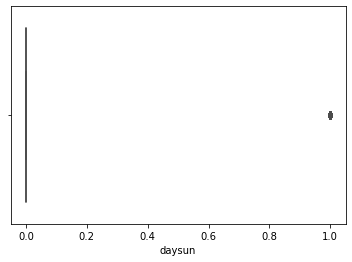

daythu


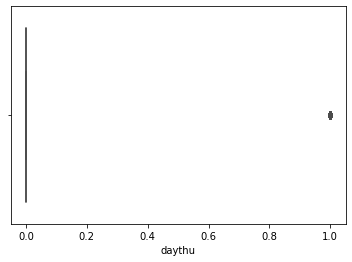

daytue


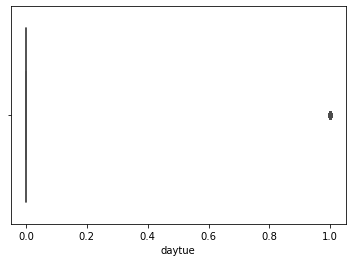

daywed


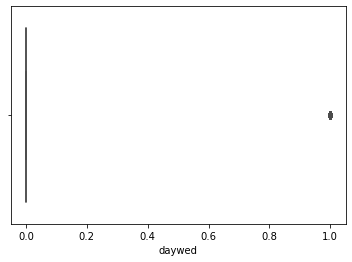

monthapr


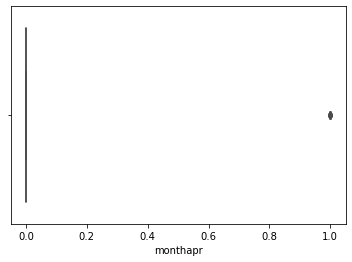

monthaug


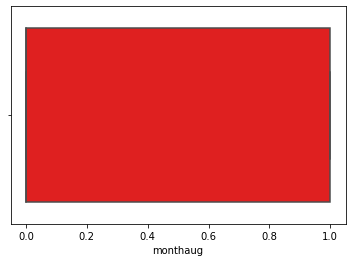

monthdec


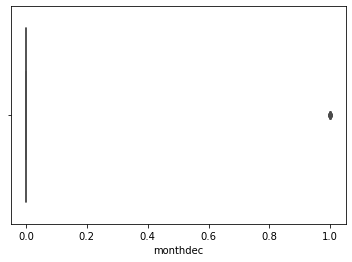

monthfeb


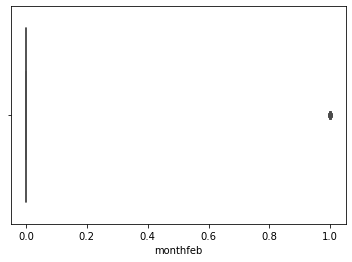

monthjan


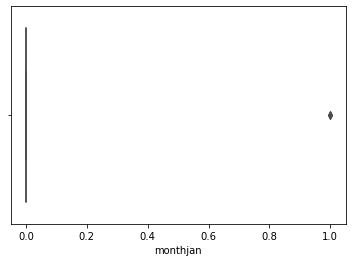

monthjul


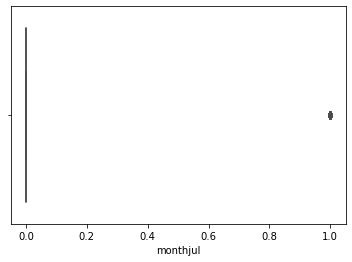

monthjun


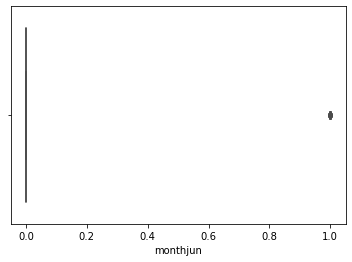

monthmar


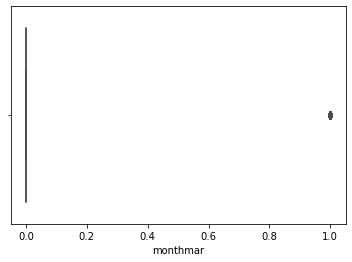

monthmay


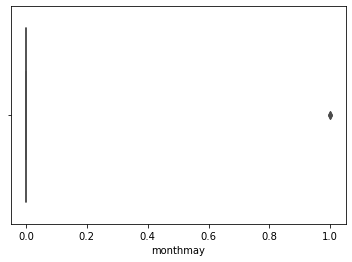

monthnov


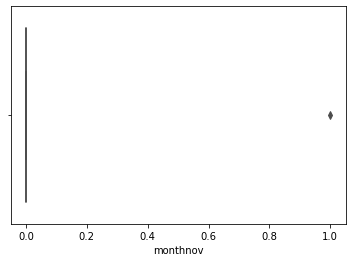

monthoct


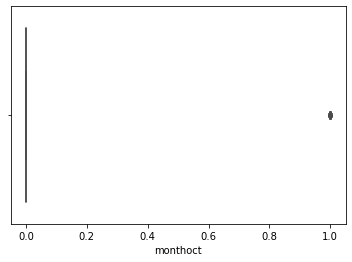

monthsep


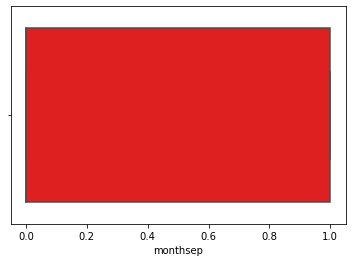

size_category


TypeError: Horizontal orientation requires numeric `x` variable.

In [14]:
import warnings 
warnings.filterwarnings("ignore")
for i in Forestfires.columns:
    print(i)
    sns.boxplot(Forestfires[i],color="red")
    plt.show()

FFMC


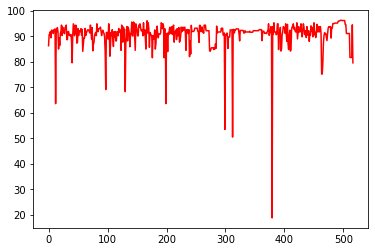

DMC


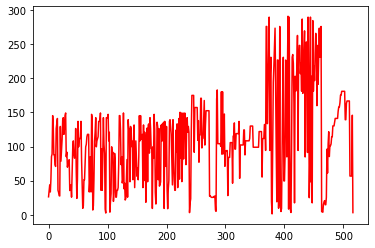

DC


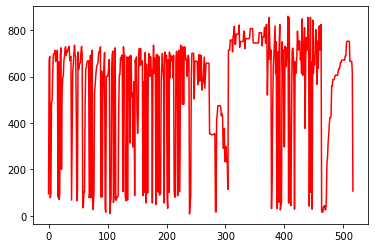

ISI


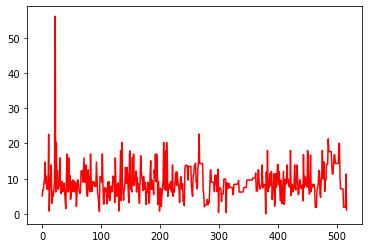

temp


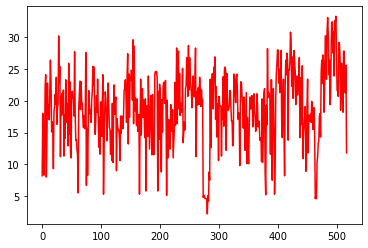

RH


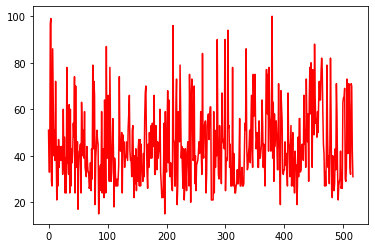

wind


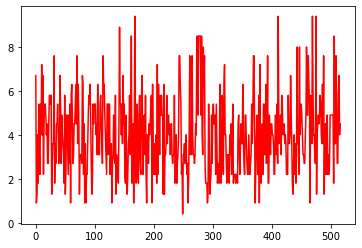

rain


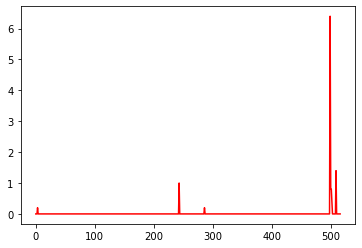

area


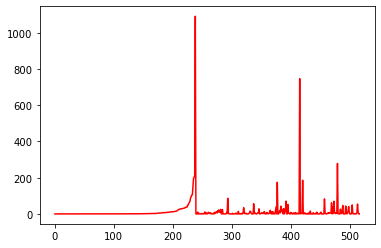

dayfri


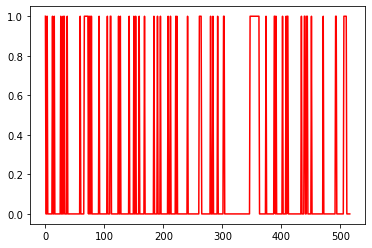

daymon


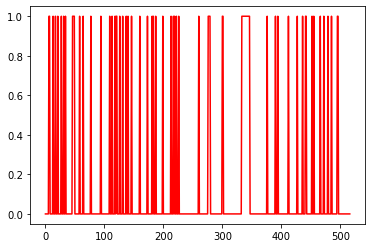

daysat


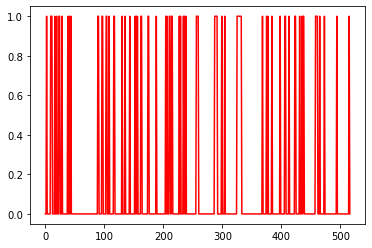

daysun


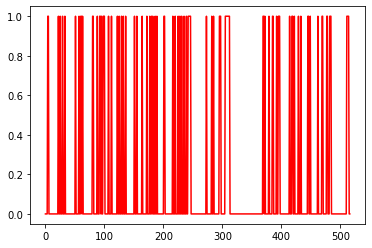

daythu


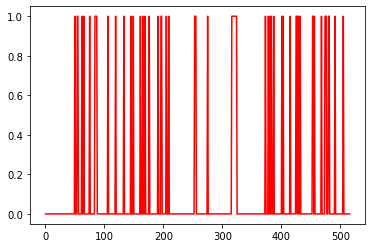

daytue


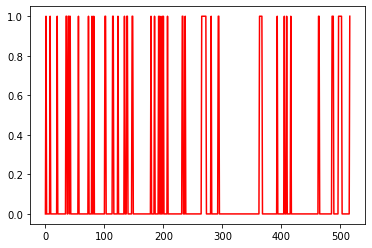

daywed


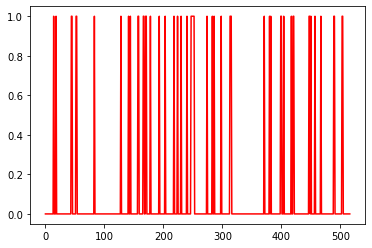

monthapr


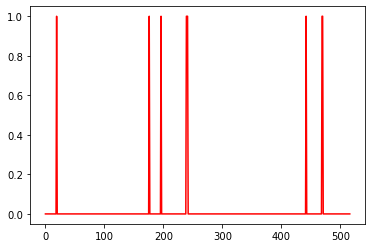

monthaug


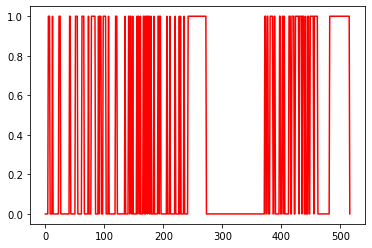

monthdec


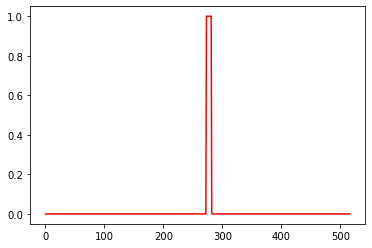

monthfeb


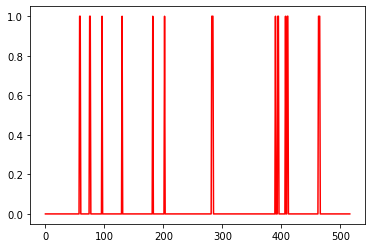

monthjan


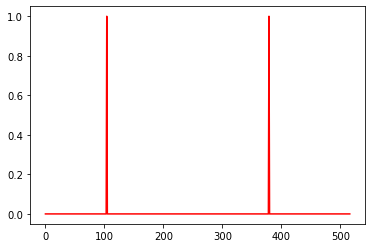

monthjul


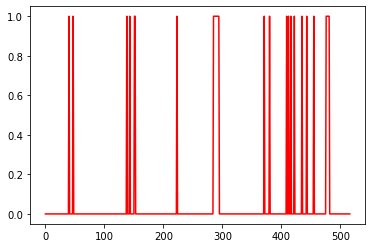

monthjun


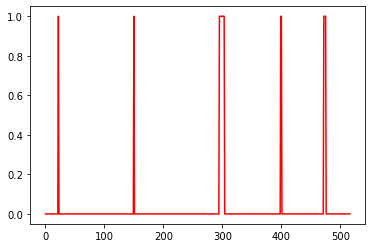

monthmar


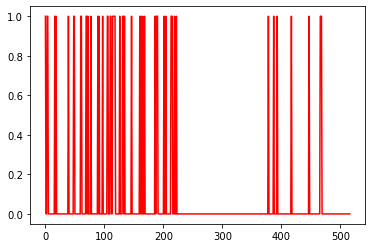

monthmay


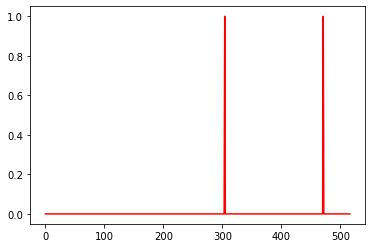

monthnov


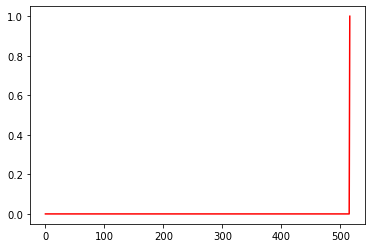

monthoct


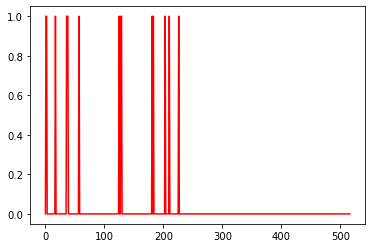

monthsep


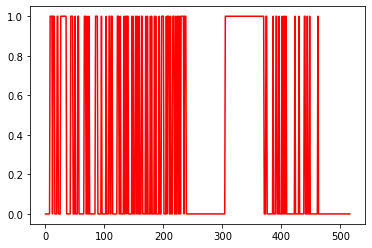

size_category


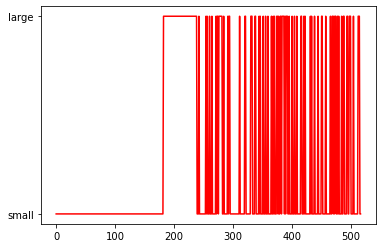

In [15]:
import warnings 
warnings.filterwarnings("ignore")
for i in Forestfires.columns:
    print(i)
    plt.plot(Forestfires[i],color="red")
    plt.show()

<AxesSubplot:>

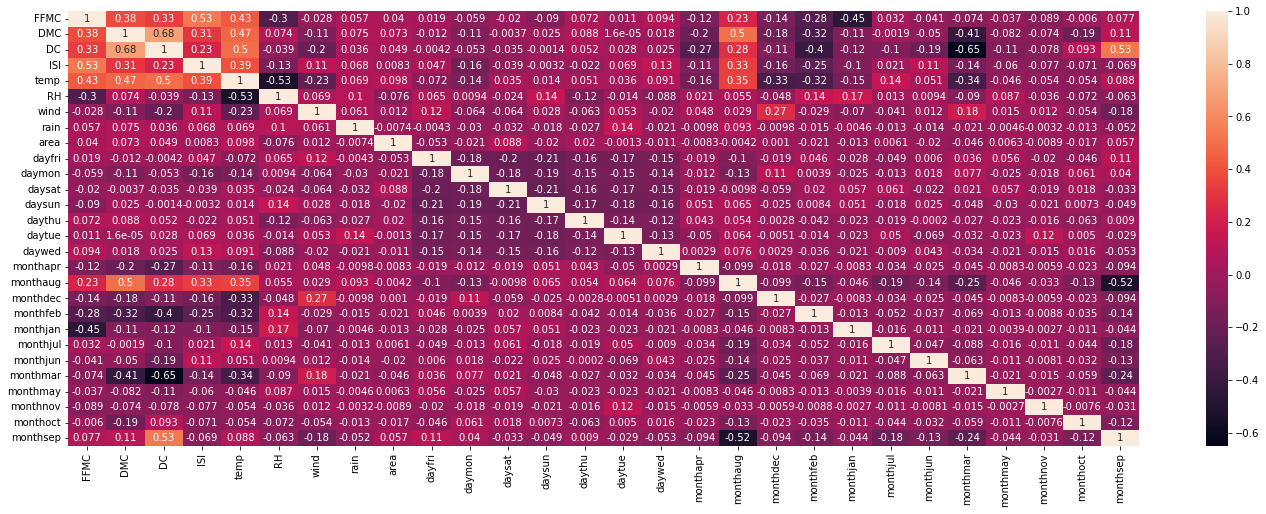

In [16]:
fig=plt.figure(figsize=(24,8))
sns.heatmap(Forestfires.corr(),annot=True)


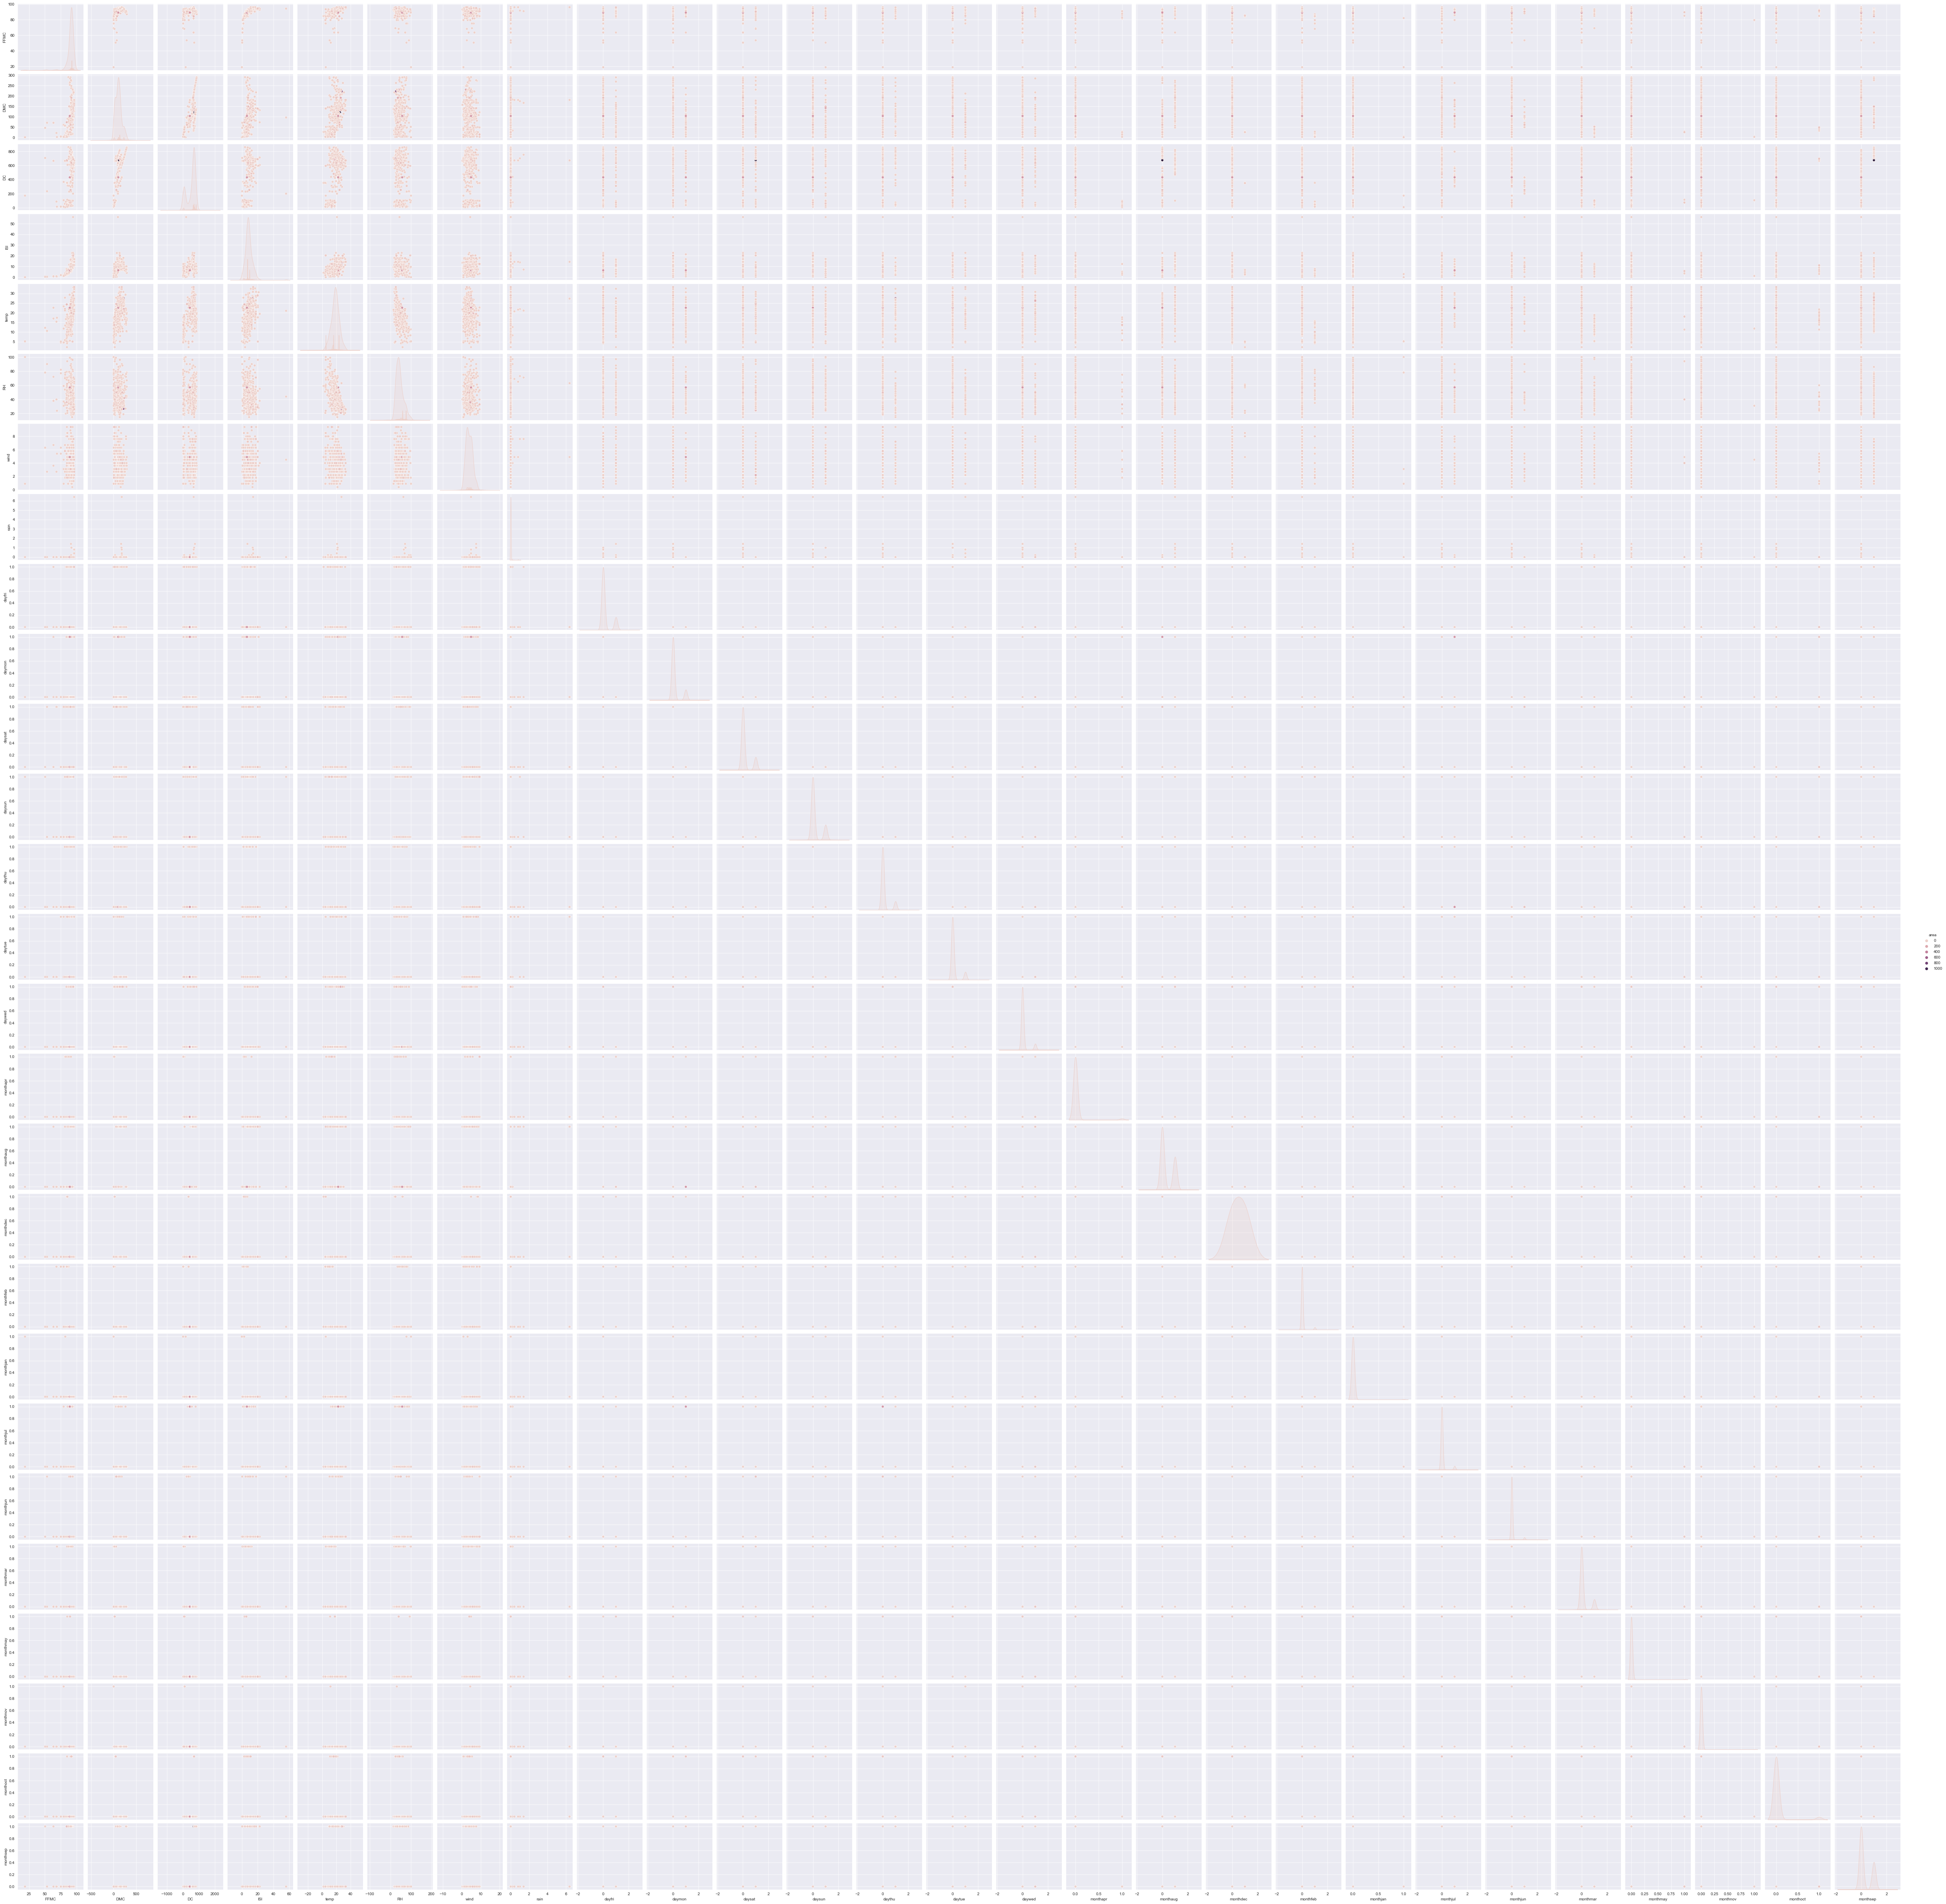

In [17]:
sns.set_style("darkgrid")
sns.pairplot(Forestfires,hue="area")
plt.show()

In [18]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=preprocessing.LabelEncoder()
Forestfires['size_category']=label_encoder.fit_transform(Forestfires['size_category'])

In [19]:
X=Forestfires.loc[:,['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category']]
y=Forestfires.loc[:,["area"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
model = Sequential()
model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))

model.add(Dense(8, kernel_initializer='uniform', activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mse'])
h=model.fit(X, y,validation_split=0.3,epochs=50, batch_size=10)

Epoch 1/50
37/37 [==============================] - 3s 7ms/step - loss: 3910.7996 - mse: 3910.7996 - val_loss: 4627.3911 - val_mse: 4627.3911
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 3853.6912 - mse: 3853.6912 - val_loss: 4548.0122 - val_mse: 4548.0122
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 3838.9075 - mse: 3838.9075 - val_loss: 4530.4053 - val_mse: 4530.4053
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 3832.0342 - mse: 3832.0342 - val_loss: 4538.3052 - val_mse: 4538.3052
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 3829.3511 - mse: 3829.3511 - val_loss: 4513.5190 - val_mse: 4513.5190
Epoch 6/50
37/37 [==============================] - 0s 2ms/step - loss: 3833.9353 - mse: 3833.9353 - val_loss: 4517.9585 - val_mse: 4517.9585
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 3828.5737 - mse: 3828.5737 - val_loss: 4516.0620 - val_mse: 4516.0620
Epoch 

In [21]:
score = model.evaluate(X,y)
print(model.metrics_names[1],score[1])

17/17 [==============================] - 0s 1ms/step - loss: 3954.6467 - mse: 3954.6467
mse 3954.646728515625


In [22]:
pred=model.predict(X_test)
pred

4/4 [==============================] - 0s 5ms/step


array([[-0.2891427 ],
       [15.043043  ],
       [22.353447  ],
       [10.513108  ],
       [16.61937   ],
       [ 1.5725722 ],
       [ 4.2233224 ],
       [13.373838  ],
       [17.81875   ],
       [ 5.506532  ],
       [17.901243  ],
       [12.312591  ],
       [13.764549  ],
       [12.041158  ],
       [12.7285385 ],
       [ 7.076391  ],
       [ 6.253967  ],
       [14.189636  ],
       [16.590204  ],
       [16.515015  ],
       [ 5.869793  ],
       [15.798117  ],
       [10.372453  ],
       [17.754318  ],
       [10.097527  ],
       [18.637941  ],
       [ 0.58876055],
       [22.520586  ],
       [17.714731  ],
       [16.973766  ],
       [16.681786  ],
       [22.288124  ],
       [15.888639  ],
       [14.334091  ],
       [ 3.6465573 ],
       [ 7.7424173 ],
       [10.870415  ],
       [21.425007  ],
       [15.250953  ],
       [11.520678  ],
       [18.447437  ],
       [15.211445  ],
       [10.869761  ],
       [18.770266  ],
       [24.07955   ],
       [11

In [23]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(pred,y_test)
mae

11642.600803975296

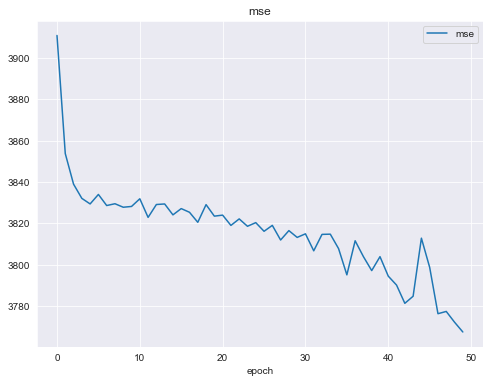

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(h.history['mse'])
plt.title('mse')
plt.xlabel('epoch')
plt.legend(['mse']);

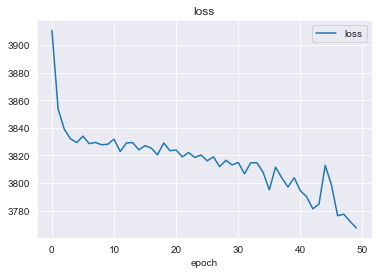

In [25]:

import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss']);